## Задача.
Найдите любую базу, подходящую для регрессии:
- Спарсите данные
- Разделите данные на обучающую и проверочную выборки
- Напишите сеть для регрессии
- Сделайте визуализацию результата
- Напишите ваши результаты и выводы


In [ ]:
import pandas as pd
from google.colab import files
from tensorflow.keras import utils
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, CuDNNLSTM

In [ ]:
#Загружаем файл с квартирами
files.upload()
!ls

Saving winequality-red.csv to winequality-red (1).csv
 sample_data  'winequality-red (1).csv'   winequality-red.csv


In [ ]:
df = pd.read_csv('winequality-red.csv', sep=";")
data = df.values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = data[:, 0:11]
y = data[:, 11]
X.shape

(1599, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train on 1279 samples, validate on 320 samples
Epoch 1/50
 - 1s - loss: 32.3015 - mae: 5.6259 - val_loss: 33.5608 - val_mae: 5.7198
Epoch 2/50
 - 0s - loss: 32.0284 - mae: 5.6019 - val_loss: 32.3584 - val_mae: 5.6168
Epoch 3/50
 - 0s - loss: 31.7496 - mae: 5.5772 - val_loss: 31.1851 - val_mae: 5.5133
Epoch 4/50
 - 0s - loss: 31.4654 - mae: 5.5521 - val_loss: 30.1074 - val_mae: 5.4161
Epoch 5/50
 - 0s - loss: 31.1896 - mae: 5.5274 - val_loss: 29.0958 - val_mae: 5.3231
Epoch 6/50
 - 0s - loss: 30.9170 - mae: 5.5030 - val_loss: 28.1423 - val_mae: 5.2340
Epoch 7/50
 - 0s - loss: 30.6452 - mae: 5.4783 - val_loss: 27.2501 - val_mae: 5.1490
Epoch 8/50
 - 0s - loss: 30.3712 - mae: 5.4535 - val_loss: 26.4129 - val_mae: 5.0679
Epoch 9/50
 - 0s - loss: 30.1019 - mae: 5.4289 - val_loss: 25.6282 - val_mae: 4.9907
Epoch 10/50
 - 0s - loss: 29.8359 - mae: 5.4045 - val_loss: 24.8908 - val_mae: 4.9171
Epoch 11/50
 - 0s - loss: 29.5629 - mae: 5.3794 - val_loss: 24.1993 - val_mae: 4.8470
Epoch 12/50
 - 0

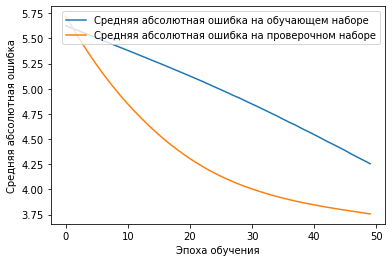

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=500,
                    validation_data=(X_test, y_test), 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Итоги.

Теперь мы умеем делать сложные непоследовательные нейросети, разделять задачи на квалификацию и регрессию, ну и конечно же отличать хорошее вино от плохого =)